<a href="https://colab.research.google.com/github/NgSang2402/AI/blob/main/FinalProject_Predicting_patient_outcomes_using_health_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
pip install Fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [151]:
import ipywidgets as widgets
from IPython.display import display


In [152]:
predict = ctrl.Consequent(np.arange(0,101,1), 'predict')
testHP = ctrl.Antecedent(np.arange(0,101,1),'testHP')
gastroduodenoscopy = ctrl.Antecedent(np.arange(0,101,1),'gastroduodenoscopy')
MedicalHistory = ctrl.Antecedent(np.arange(0,101,1),'MedicalHistory')
heartbeat = ctrl.Antecedent(np.arange(0,101,1),'heartbeat')
BloodPressure = ctrl.Antecedent(np.arange(0,101,1),'BloodPressure')
Temperature = ctrl.Antecedent(np.arange(0,101,1),'Temperature')

predict['Nguy kịch']=fuzz.trimf(predict.universe,[0,0,2])
predict['Theo dõi điều trị']= fuzz.trimf(predict.universe,[2,15,40])
predict['Uống thuốc tái khám']= fuzz.trapmf(predict.universe,[40,50,85,90])
predict['Khỏi bệnh']= fuzz.trimf(predict.universe,[90,100,100])
testHP['Dương tính']=fuzz.trimf(testHP.universe,[0,0,50])
testHP['Âm tính']=fuzz.trimf(testHP.universe,[50,100,100])
gastroduodenoscopy['Viêm sưng + xuất huyết nặng']=fuzz.trimf(gastroduodenoscopy.universe,[0,0,25])
gastroduodenoscopy['Loét + Viêm sưng']=fuzz.trimf(gastroduodenoscopy.universe,[25,40,50])
gastroduodenoscopy['Loét nhẹ']=fuzz.trimf(gastroduodenoscopy.universe,[50,70,75])
gastroduodenoscopy['Bình thường']=fuzz.trimf(gastroduodenoscopy.universe,[75,92,100])
MedicalHistory['Có']=fuzz.trimf(MedicalHistory.universe,[0,0,50])
MedicalHistory['Không']=fuzz.trimf(MedicalHistory.universe,[50,100,100])
heartbeat['Dưới 40']=fuzz.trimf(heartbeat.universe,[0,0,20])
heartbeat['Bình thường']= fuzz.trapmf(heartbeat.universe,[17,22,77,85])
heartbeat['Trên 120']=fuzz.trimf(heartbeat.universe,[80,100,100])
BloodPressure['Thấp']=fuzz.trimf(BloodPressure.universe,[0,0,25])
BloodPressure['Bình thường']=fuzz.trapmf(BloodPressure.universe,[22,30,68,72])
BloodPressure['Cao']=fuzz.trimf(BloodPressure.universe,[70,100,100])
Temperature['Thấp']=fuzz.trimf(Temperature.universe,[0,0,12])
Temperature['Bình thường']=fuzz.trapmf(Temperature.universe,[12,15,79,80])
Temperature['Cao']=fuzz.trimf(Temperature.universe,[80,100,100])







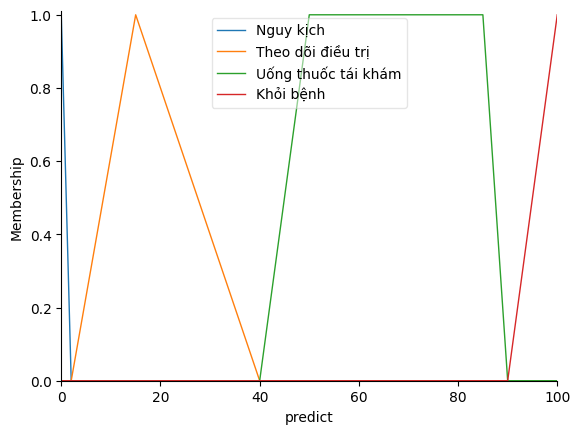

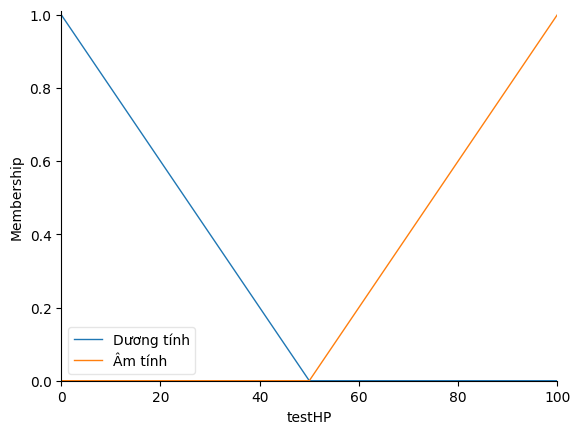

In [153]:
predict.view()
testHP.view()




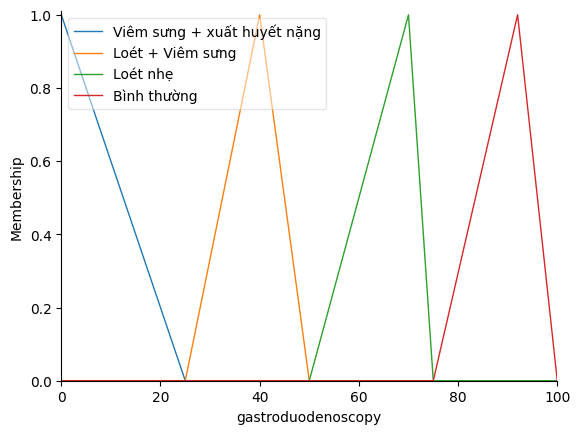

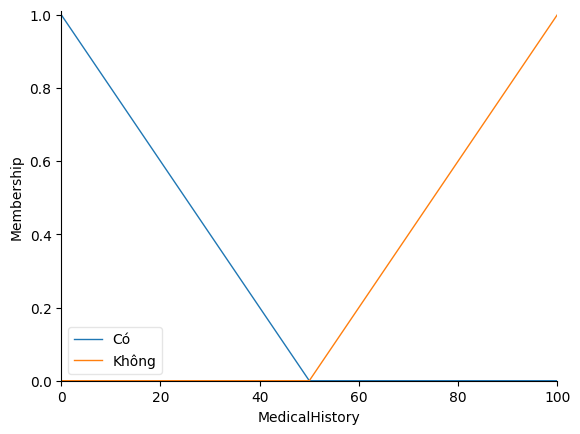

In [154]:
gastroduodenoscopy.view()
MedicalHistory.view()

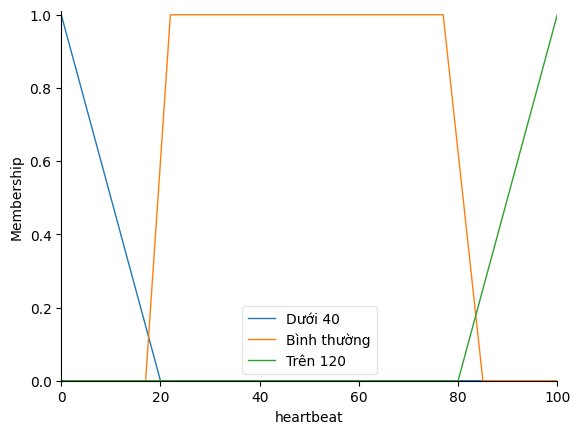

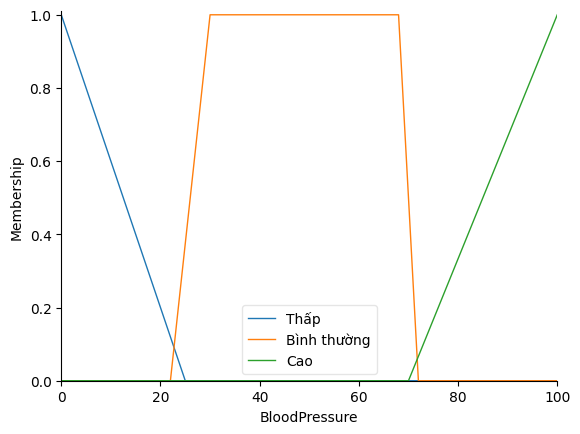

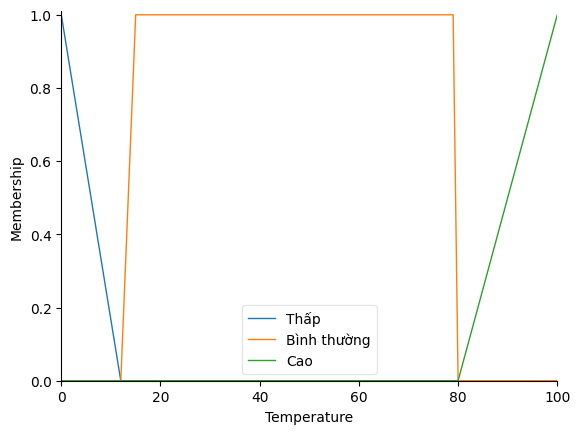

In [155]:
heartbeat.view()
BloodPressure.view()
Temperature.view()

In [156]:
Rule1 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule2 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule3 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule4 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule5 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule6 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule7 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule8 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule9 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule10 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule11 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule12 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule13 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule14 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule15 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )

Rule16 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule17 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule18 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule19 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule20 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule21 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule22 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule23 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule24 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule25 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule26 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule27 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule28 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule29 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule30 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule31 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule32 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule33 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule34 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule35 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule36 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )


Rule37 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule38 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule39 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule40 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule41 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule42 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule43 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule44 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule45 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule46 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule47 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule48 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule49 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule50 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule51 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule54 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule52 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule53 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule55 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule56 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule57 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule58 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule59 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule60 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule61 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule62 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule63 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule64 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule65 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule66 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule67 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule68 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule69 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule70 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule71 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule72 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule73 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule74 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule75 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule76 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule77 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule78 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule79 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule80 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule81 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule82 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule83 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule84 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule85 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule86 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule87 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule88 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule89 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule90 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule91 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule92 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule93 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule94 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule95 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule96 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule97 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule98 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule99 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule100 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule101 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule102 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule103 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule104 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule105 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule106 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule107 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule108 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule109 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule110 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule111 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule112 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule113 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule114 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule115 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule116 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule117 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule118 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule119 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule120 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule121 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule122 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule123 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule124 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule125 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule126 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule127 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule128 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule129 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule130 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule131 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule132 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule133 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule134 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule135 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule136 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule137 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule138 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule139 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule140 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule141 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule142 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule143 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule144 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule145 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule146 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule147 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule148 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule149 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule150 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule151 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule152 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule153 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule154 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule155 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule156 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule157 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule158 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule159 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule160 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule161 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule162 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule163 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule164 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule165 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule166 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule167 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule168 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule169 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule170 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule171 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule172 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule173 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule174 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule175 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule176 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule177 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule178 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule179 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule180 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule181 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule182 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule183 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule184 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule185 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule186 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule187 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule188 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule189 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule190 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule191 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule192 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule193 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule194 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule195 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule196 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule197 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule198 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule199 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule200 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule201 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule202 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule203 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule204 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule205 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule206 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule207 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule208 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule209 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule210 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule211 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule212 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule213 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule214 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule215 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule216 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule217 = ctrl.Rule(testHP['Dương tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )


Rule218 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule219 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule220 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule221 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule222 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule223 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule224 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule225 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule226 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule227 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule228 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule229 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule230 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule231 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule232 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )

Rule233 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule234 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule235 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule236 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule237 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule238 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule239 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule240 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule241 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule242 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule243 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule244 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule245 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule246 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule247 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule248 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule249 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule250 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule251 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule252 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule253 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )


Rule254 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule255 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule256 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule257 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule258 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule259 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule260 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule261 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule262 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule263 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule264 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule265 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule266 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule267 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule268 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule269 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule270 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule271 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Viêm sưng + xuất huyết nặng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule272 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule273 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule274 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule275 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule276 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule277 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule278 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule279 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule280 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule281 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule282 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule283 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule284 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule285 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule286 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule287 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule288 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule289 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule290 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule291 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule292 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule293 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule294 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule295 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule296 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule297 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule298 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule299 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule300 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule301 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule302 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule303 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule304 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule305 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule306 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule307 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule308 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule309 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule310 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule311 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule312 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule313 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule314 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule315 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule316 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule317 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule318 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule319 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule320 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Nguy kịch'] )
Rule321 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule322 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule323 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule324 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule325 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét + Viêm sưng']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule326 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule327 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule328 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule329 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule330 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule331 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule332 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule333 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule334 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule335 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule336 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule337 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule338 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule339 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule340 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule341 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule342 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule343 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule344 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule345 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule346 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule347 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule348 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule349 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule350 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule351 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule352 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule353 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule354 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule355 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule356 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule357 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule358 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule359 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule360 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule361 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule362 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule363 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule364 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule365 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule366 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule367 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule368 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule369 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule370 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule371 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule372 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule373 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule374 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule375 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule376 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule377 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule378 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule379 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Loét nhẹ']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )

Rule380 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule381 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule382 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule383 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule384 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule385 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule386 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule387 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule388 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule399 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Khỏi bệnh'] )
Rule400 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Khỏi bệnh'] )
Rule401 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule402 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Khỏi bệnh'] )
Rule403 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Khỏi bệnh'] )
Rule404 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Uống thuốc tái khám'] )
Rule405 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule406 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Khỏi bệnh'] )
Rule407 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )

Rule408 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule409 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule410 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule411 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule412 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule413 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule414 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule415 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule416 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Có']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule417 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule418 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule419 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule420 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule421 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule422 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule423 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule424 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule425 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Trên 120']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule426 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule427 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Khỏi bệnh'] )
Rule428 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Cao']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule429 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Uống thuốc tái khám'] )
Rule430 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Khỏi bệnh'] )
Rule431 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule432 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule433 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Khỏi bệnh'] )
Rule434 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Bình thường']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule435 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Cao'],predict['Nguy kịch'] )
Rule436 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule437 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Cao']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule438 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Cao'],predict['Theo dõi điều trị'] )
Rule439 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Bình thường'],predict['Uống thuốc tái khám'] )
Rule440 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Bình thường']& Temperature['Thấp'],predict['Theo dõi điều trị'] )
Rule441 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )
Rule442 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Bình thường'],predict['Theo dõi điều trị'] )
Rule443 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Thấp'],predict['Nguy kịch'] )
Rule444 = ctrl.Rule(testHP['Âm tính']& gastroduodenoscopy['Bình thường']& MedicalHistory['Không']& heartbeat['Dưới 40']& BloodPressure['Thấp']& Temperature['Cao'],predict['Nguy kịch'] )


In [157]:
tipping_ctrl = ctrl.ControlSystem([Rule1,Rule2,Rule3,Rule4,Rule5,Rule6,Rule7,Rule8,Rule9,Rule10,Rule11,Rule12,Rule13,Rule14,Rule15,Rule16,Rule17,Rule18,Rule19,Rule20,Rule21,Rule22,Rule23,Rule24,Rule25,Rule26,Rule27,Rule28,Rule29,Rule30,Rule31,Rule32,Rule33,Rule34,Rule35,Rule36,Rule37,Rule38,Rule39,Rule40,Rule41,Rule42,Rule43,Rule44,Rule45,Rule46,Rule47,Rule48,Rule49,Rule50,Rule51,Rule52,Rule53,Rule54,Rule55,Rule56,Rule57,Rule58,Rule59,Rule60,Rule61,Rule62,Rule63,Rule64,Rule65,Rule66,Rule67,Rule68,Rule69,Rule70,Rule71,Rule72,Rule73,Rule74,Rule75,Rule76,Rule77,Rule78,Rule79,Rule80,Rule81,Rule82,Rule83,Rule84,Rule85,Rule86,Rule87,Rule88,Rule89,Rule90,Rule91,Rule92,Rule93,Rule94,Rule95,Rule96,Rule97,Rule98,Rule99,Rule100,Rule101,Rule102,Rule103,Rule104,Rule105,Rule106,Rule107,Rule108,Rule109,Rule110,Rule111,Rule112,Rule113,Rule114,Rule115,Rule116,Rule117,Rule118,Rule119,Rule120,Rule121,Rule122,Rule123,Rule124,Rule125,Rule126,Rule127,Rule128,Rule129,Rule130,Rule131,Rule132,Rule133,Rule134,Rule135,Rule136,Rule137,Rule138,Rule139,Rule140,Rule141,Rule142,Rule143,Rule144,Rule145,Rule146,Rule147,Rule148,Rule149,Rule150,Rule151,Rule152,Rule153,Rule154,Rule155,Rule156,Rule157,Rule158,Rule159,Rule160,Rule161,Rule162,Rule163,Rule164,Rule165,Rule166,Rule167,Rule168,Rule169,Rule170,Rule171,Rule172,Rule173,Rule174,Rule175,Rule176,Rule177,Rule178,Rule179,Rule180,Rule181,Rule182,Rule183,Rule184,Rule185,Rule186,Rule187,Rule188,Rule189,Rule190,Rule191,Rule192,Rule193,Rule194,Rule195,Rule196,Rule197,Rule198,Rule199,Rule200,Rule201,Rule202,Rule203,Rule204,Rule205,Rule206,Rule207,Rule208,Rule209,Rule210,Rule211,Rule212,Rule213,Rule214,Rule215,Rule216,Rule217,Rule218,Rule219,Rule220,Rule221,Rule222,Rule223,Rule224,Rule225,Rule226,Rule227,Rule228,Rule229,Rule230,Rule231,Rule232,Rule233,Rule234,Rule235,Rule236,Rule237,Rule238,Rule239,Rule240,Rule241,Rule242,Rule243,Rule244,Rule245,Rule246,Rule247,Rule248,Rule249,Rule250,Rule251,Rule252,Rule253,Rule254,Rule255,Rule256,Rule257,Rule258,Rule259,Rule260,Rule261,Rule262,Rule263,Rule264,Rule265,Rule266,Rule267,Rule268,Rule269,Rule270,Rule271,Rule272,Rule273,Rule274,Rule275,Rule276,Rule277,Rule278,Rule279,Rule280,Rule281,Rule282,Rule283,Rule284,Rule285,Rule286,Rule287,Rule288,Rule289,Rule290,Rule291,Rule292,Rule293,Rule294,Rule295,Rule296,Rule297,Rule298,Rule299,Rule300,Rule301,Rule302,Rule303,Rule304,Rule305,Rule306,Rule307,Rule308,Rule309,Rule310,Rule311,Rule312,Rule313,Rule314,Rule315,Rule316,Rule317,Rule318,Rule319,Rule320,Rule321,Rule322,Rule323,Rule324,Rule325,Rule326,Rule327,Rule328,Rule329,Rule330,Rule331,Rule332,Rule333,Rule334,Rule335,Rule336,Rule337,Rule338,Rule339,Rule340,Rule341,Rule342,Rule343,Rule344,Rule345,Rule346,Rule347,Rule348,Rule349,Rule350,Rule351,Rule352,Rule353,Rule354,Rule355,Rule356,Rule357,Rule358,Rule359,Rule360,Rule361,Rule362,Rule363,Rule364,Rule365,Rule366,Rule367,Rule368,Rule369,Rule370,Rule371,Rule372,Rule373,Rule374,Rule375,Rule376,Rule377,Rule378,Rule379,Rule380,Rule381,Rule382,Rule383,Rule384,Rule385,Rule386,Rule387,Rule388,Rule399,Rule400,Rule401,Rule402,Rule403,Rule404,Rule405,Rule406,Rule407,Rule408,Rule409,Rule410,Rule411,Rule412,Rule413,Rule414,Rule415,Rule416,Rule417,Rule418,Rule419,Rule420,Rule421,Rule422,Rule423,Rule424,Rule425,Rule426,Rule427,Rule428,Rule429,Rule430,Rule431,Rule432,Rule433,Rule434,Rule435,Rule436,Rule437,Rule438,Rule439,Rule440,Rule441,Rule442,Rule443,Rule444])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)



In [173]:
button = widgets.Button(description="Hiển thị kết quả")
#Tiền sử
label1 = widgets.Label("Tiền sử:")
MedicalHistory = widgets.Combobox(options=['có', 'không'],)
def handle_Me_change(change):
    if change['new'] == 'có':
        global value
        value = 0
    elif change['new'] == 'không':
       
        value = 100
    else:
      
        value = None
#Nhịp tim
label2 = widgets.Label("Nhịp tim:")
HeartBeat = widgets.Text(placeholder='38-125')
#Huyết áp
label3 = widgets.Label("Huyết áp:")
BloodPressure = widgets.Text(placeholder='60-180')
#Nhiệt độ
label4 = widgets.Label("Nhiệt độ:")
Temperature = widgets.Text(placeholder='36.3-39')
#Nội soi
label5 = widgets.Label("Nội soi:")
Gastro = widgets.Combobox(options=['Viêm sưng + xuất huyết nặng', 'Loét + viêm sưng', 'Loét nhẹ', 'Bình thường'],)
def handle_Gastro_change(change):
    if change['new'] == 'Viêm sưng + xuất huyết nặng':
        global ga
        ga = 0
    elif change['new'] == 'Loét + viêm sưng':
        ga = 40
    elif change['new'] == 'Loét nhẹ':
        ga = 70
    elif change['new'] == 'Bình thường':
        ga = 92
    else:
        ga = None
#HP
label6 = widgets.Label("Test HP:")
Hp = widgets.Combobox(options=['Âm tính', 'Dương tính'],)
def handle_HP_change(change):
    if change['new'] == 'Âm tính':
        global hp
        hp = 100
    elif change['new'] == 'Dương tính':
        hp = 0
      
    else:
        hp = None
   




MedicalHistory.observe(handle_Me_change, names='value')
Gastro.observe(handle_Gastro_change, names='value')
Hp.observe(handle_HP_change, names='value')



ga = None  
if ga is not None:
    ga = int(ga)
     
hp = None  
if hp is not None:
    hp = int(hp)
      
value = None 
if  value is not None:
    value = int(value)
    

    
def on_button_clicked(b):
    T1 = HeartBeat.value
    T2 = BloodPressure.value
    T3 = Temperature.value
      
    if T1 is not None:
      T1 = int(T1)
      He = ((T1-38)/87)*100
      tipping.input['heartbeat'] = He
    
    if T2 is not None:
      T2 = float(T2)
      BL = ((T2-60)/120)*100
      tipping.input['BloodPressure'] = BL
    
    if T3 is not None:
      T3 = float(T3)
      Tem = ((T3-36.3)/2.7)*100 
      tipping.input['Temperature'] = Tem
    tipping.input['gastroduodenoscopy'] = ga
    tipping.input['testHP'] = hp
    tipping.input['MedicalHistory'] = value

    print("T1", He)
    print("T2", BL)
    print("T3", Tem)

    tipping.compute()
    print(tipping.output['predict'])
    predict.view(sim=tipping) 
    
button.on_click(on_button_clicked)







# Hiển thị combobox
display(label1, MedicalHistory)
display(label2, HeartBeat)
display(label3, BloodPressure)
display(label4, Temperature)
display(label5, Gastro)
display(label6, Hp)
display(button)

Label(value='Tiền sử:')

Combobox(value='', options=('có', 'không'))

Label(value='Nhịp tim:')

Text(value='', placeholder='38-125')

Label(value='Huyết áp:')

Text(value='', placeholder='60-180')

Label(value='Nhiệt độ:')

Text(value='', placeholder='36.3-39')

Label(value='Nội soi:')

Combobox(value='', options=('Viêm sưng + xuất huyết nặng', 'Loét + viêm sưng', 'Loét nhẹ', 'Bình thường'))

Label(value='Test HP:')

Combobox(value='', options=('Âm tính', 'Dương tính'))

Button(description='Hiển thị kết quả', style=ButtonStyle())